## Week2 授業課題2 富士下山問題

### 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

In [47]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

In [49]:
print(fuji[0:10])
# 左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」となっています。
# 標高と距離の単位はメートルです。300地点のデータです。

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


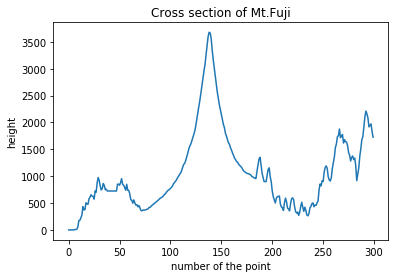

In [50]:
x = fuji[:, 0]
y = fuji[:, -2]

plt.title("Cross section of Mt.Fuji")
plt.xlabel("number of the point")
plt.ylabel("height")
plt.plot(x, y,)
plt.show()


### 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [51]:
def func_gradient_calculation(_pos_now):
    if _pos_now == 0:
        return 0
    _gradient_now = fuji[_pos_now, 3] - fuji[_pos_now-1, 3]
    return _gradient_now

pos_now = 10
gradient_now = func_gradient_calculation(pos_now)
print(gradient_now)

117.15


### 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α は0より大きい任意の値をとるハイパーパラメータです。
機械学習の分野では学習率という名前で呼ばれます。
この値によって下り方が変わります。ここでは例えば0.2に設定してください。

実装上の注意

上記式を計算すると移動先の地点には浮動小数点数が現れますが、
今回勾配の情報を得るためには地点は整数で表す必要があります。
そのため、四捨五入による変換を行ってください。また、取り柄ない値となった場合の処理が必要です。
例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

ハイパーパラメータとは

機械学習手法において、その手法自身では最適化が行えない値のことです。
値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。
最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [85]:
def func_get_next_point(_pos_now, alpha=0.2):
    
    _pos_next = np.round(_pos_now - alpha * func_gradient_calculation(_pos_now)).astype(np.int)
    if _pos_next > max(fuji[:, 0]) or _pos_next < min(fuji[:, 0]):
        return "移動先の地点は、リストの範囲外です"
    return _pos_next
pos_now = 136
pos = func_get_next_point(pos_now)
print(pos)

102


### 【問題4】山を下る関数を作成 
山を下る関数を作成してください。
最初の地点を受け取り、問題3の関数によって地点を更新していきます。
移動毎の地点はリストなどに記録して、これを関数の返り値としてください。
最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

実装上の注意
問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。
移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [99]:
def func_downhill(_pos_now, alpha=0.2):
    _next_pos_ary = np.array([_pos_now])
    _height_ary = np.array([fuji[_pos_now,3]])
    
    if type(func_get_next_point(pos_now))==str:
        return "移動先の地点は、リストの範囲外です","移動先の地点は、リストの範囲外です"
    n=0
    while func_get_next_point(_next_pos_ary[-1]) != _next_pos_ary[-1]  or n<10:
        _next_pos_ary = np.append(_next_pos_ary, func_get_next_point(_next_pos_ary[-1]))
        _height_ary = np.append(_height_ary, fuji[func_get_next_point(_next_pos_ary[-1]), 3])
        n+=1
    return _next_pos_ary, _height_ary

pos_now = 136
pos_ary, height_ary = func_downhill(pos_now)
print(pos_ary)
#print(height_ary)
#func_downhill(pos_now)

[136 102  98  95  93  89  85  82  79  73  70  78  77  75]


### 【問題5】下山過程の可視化 
問題4における下山過程をMatplotlibを使いグラフで可視化してください。
可視化例
断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

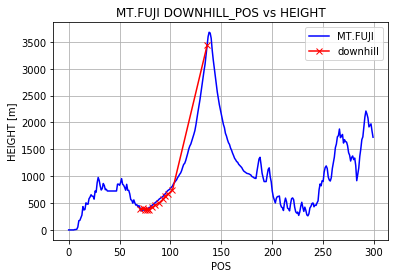

In [100]:
def func_graph(_x, _y, _label,
               _x2, _y2, _label2,
               _title, _xlabel, _ylabel):
    plt.title(_title)
    plt.xlabel(_xlabel)
    plt.ylabel(_ylabel)
    plt.plot(_x,_y,color="b",label=_label)
    plt.plot(_x2,_y2, marker="x",color="r",label=_label2)
    plt.grid()
    plt.legend()
    plt.show()
func_graph(x, y, "MT.FUJI",
           pos_ary, height_ary, "downhill",
           "MT.FUJI DOWNHILL_POS vs HEIGHT", "POS", "HEIGHT [m]")

### 【問題6】初期値の変更 
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。
そして、
いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。

機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。
初期値とは
今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [104]:
def func_downhill(_pos_now, alpha=0.2):
    _next_pos_ary = np.array([_pos_now])
    _height_ary = np.array([fuji[_pos_now,3]])
    
    if type(func_get_next_point(pos_now))==str:
        return "移動先の地点は、リストの範囲外です","移動先の地点は、リストの範囲外です"
    n=0
    while func_get_next_point(_next_pos_ary[-1]) != _next_pos_ary[-1]:#  or n<10:
        _next_pos_ary = np.append(_next_pos_ary, func_get_next_point(_next_pos_ary[-1]))
        _height_ary = np.append(_height_ary, fuji[func_get_next_point(_next_pos_ary[-1]), 3])
        n+=1
    return _next_pos_ary, _height_ary

for pos in range(len(fuji[:,0])):
    pos_ary, height_ary = func_downhill(pos)
#    if func_downhill(pos) == ('移動先の地点は、リストの範囲外です', '移動先の地点は、リストの範囲外です'):
#        print("移動先の地点は、リストの範囲外です")
    print(pos_ary)

[0]
[1]
[2]
[3]
[4]
[5]
[6 5]
[7]
[8 7]
[9 1]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [102]:
pos=10
func_downhill(pos)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### 【問題7】（アドバンス問題）ハイパーパラメータの変更 
ハイパーパラメータ αを変化させるとどのような下山過程となるか、問題5のように可視化してください。
そして、ハイパーパラメータにより結果が大きく異なることを確認してください。